In [2]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.optimizers import RMSprop

In [3]:
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import LSTM
import matplotlib.pyplot as plt
import pickle
import heapq

In [4]:
path = '1661-0.txt'
text = open(path).read().lower()
print('corpus length:',len(text))

corpus length: 581888


In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sara Bharat
[nltk_data]     Mali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import nltk.tokenize
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)


In [7]:
import numpy as np

In [8]:
unique_words= np.unique(words)
unique_word_index = dict((c,i) for i,c in enumerate(unique_words))

In [9]:
# Define word length and prepare input sequences
WORD_LENGTH = 5
prev_words = []
next_words = []

for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])

print(prev_words[0])

print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [10]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)

for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [11]:
print(X[0][0])

[False False False ... False False False]


In [12]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))


In [13]:
optimizer = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Train the model

history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history



Epoch 1/2



811/811 [==============================] - 127s 152ms/step - loss: 6.6957 - accuracy: 0.0527 - val_loss: 7.2837 - val_accuracy: 0.0538
Epoch 2/2
811/811 [==============================] - 121s 150ms/step - loss: 6.4823 - accuracy: 0.0530 - val_loss: 7.2443 - val_accuracy: 0.0538


In [14]:
# Save the model and history
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))

# Load the model and history
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))


c:\Users\Sara Bharat Mali\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
print(type(history))
print(history.keys())

<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


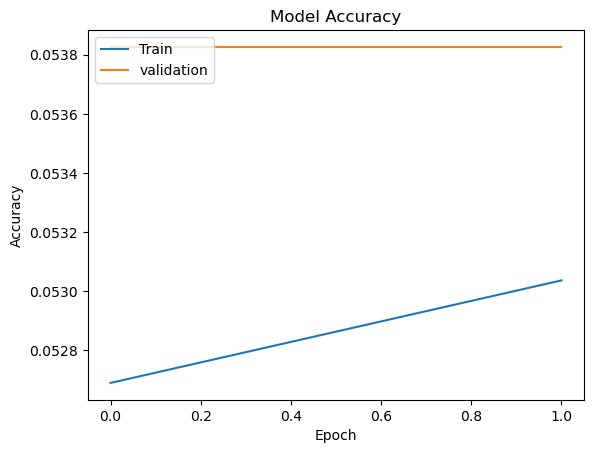

In [16]:

plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.legend(['Train','validation'],loc='upper left')
plt.show()

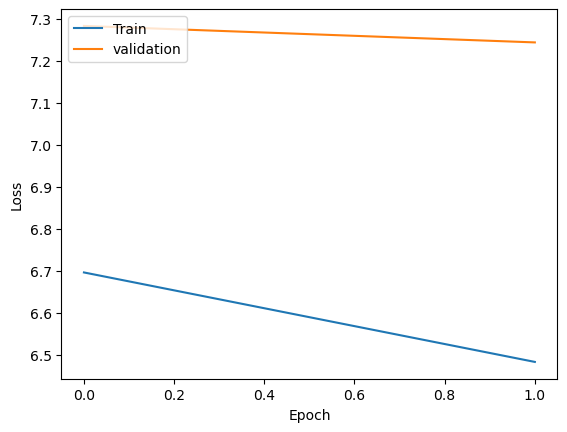

In [17]:

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [18]:
def prepare_input(text):
   
    x = np.zeros((1,SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
            x[0, t, unique_word_index[word]] = 1
    return x


In [19]:
import numpy as np
SEQUENCE_LENGTH = 50
chars=['a','b','c',...]
char_indices= {char: index for index, char in enumerate(chars)}
def prepare_input(text):
    x= np.zeros((1,SEQUENCE_LENGTH, len(chars)))
    text = text[:SEQUENCE_LENGTH]
    for t, char in enumerate(text):
        if char in char_indices:
            x[0,t,char_indices[char]] =1
    return X
input_text = "Thus is an example of input for our LSTM".lower()
prepare_input = prepare_input(input_text)        
        
 


In [20]:
def prepare_input(text):
  x= np.zeros((1,WORD_LENGTH, len(unique_words)))
  for t, word in enumerate(text.split()):
     print(word)
     x[0,t,unique_word_index[word]] =1
     return x
prepare_input("It is not a lack".lower()) 

it


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [21]:
def sample(preds, top_n=3):
    preds= np.asarray(preds).astype('float64')
    preds= np.log(preds)
    exp_preds = np.exp(preds)
    preds= exp_preds/ np.sum(exp_preds)
    return heapq.nlargest(top_n. range(len(preds)),preds.take)
    

In [22]:
def predict_complettion(text):
    original_text= text
    generated= textcompletion=''
    while True:
        x= prepare_iput(text)
        preds= model.predict(x, verbose=0)[0]
        next_index= sample(preds, top_n=1)[0]
        next_char= indices_char[next_index]
        text= text[1:]+ next_char
        completion+= next_char
        if len(original_text+ completion)+2> len(original_text) and next_char=='':
            return completion

In [23]:
def predict_complettions(text, n=3):
    x= prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices =sample(preds,n) 
    return [indices_char[idx] +predict_completion(text[1:]+indices_char[idx]) for idx in next_indices]

In [24]:
def prepare_input(text):
    x= np.zeros((1,5, len(unique_word_index)))
    words = text.split()[:5]
    for t, word in enumerate(words):
        if word in unique_word_index:
            word_index= unique_word_index[word]
            x[0,t,word_index]=1
    return x        

In [25]:
# Generate predictions for quotes
quotes = [
    "The name of the maker, no doubt; or his monogram, rather.",
    "Ah, of course, I forgot that. But the writing?",
    "A proposition which I took the liberty of doubting.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "Save, perhaps, the Sign of Four."
]
def predict_completions(sequence, num_completions):
    completions= [f"completion (i+1)" for i in range(num_completions)]
    return completions
for q in quotes:
    seq= q[:40].lower()
    print(seq)
    print(predict_completions(seq,5))
    print()

the name of the maker, no doubt; or his 
['completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)']

ah, of course, i forgot that. but the wr
['completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)']

a proposition which i took the liberty o
['completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)']

and those who were seen dancing were tho
['completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)']

save, perhaps, the sign of four.
['completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)', 'completion (i+1)']

